In [1]:
#import specific packages:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm, skew
from IPython.core.interactiveshell import InteractiveShell


plt.rcParams['figure.figsize']=(15,8)


In [2]:
#Open file and Save to Dataframe:
file = open(r'C:\Users\eshai\SB Projects\Cap 2\train.csv')
file2 = open(r'C:\Users\eshai\SB Projects\Cap 2\test.csv')

traindf = pd.read_csv(file)
testdf = pd.read_csv(file2)

file.close()
file2.close()

In [3]:
#view data info:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# Identify other missing data in training set:
total = traindf.isnull().sum().sort_values(ascending=False)
percent = (traindf.isnull().sum()/traindf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [5]:
#Removing variables that are mostly full of nan values:
df = traindf.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley','Id'], axis=1)

In [6]:
# Handle categorical and numerical missing values:
objectcl = df.loc[:, df.dtypes == 'object'].columns
num = df.loc[:, df.dtypes != 'object'].columns
df[objectcl] = df[objectcl].fillna('none')
df[num] = df[num].fillna(0)

In [7]:
#verify no Nan values left:
df.isnull().sum().sort_values(ascending=False).head(10)

SalePrice      0
Foundation     0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
MasVnrArea     0
ExterQual      0
ExterCond      0
BsmtQual       0
dtype: int64

In [8]:
# Identify other missing data in test set
total = testdf.isnull().sum().sort_values(ascending=False)
percent = (testdf.isnull().sum()/testdf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


A quick overview of the data reveals that we have columns that have a majority of nan values. These columns will need to be removed. As for the nan values in the other columns, I will remove those obsevations from the data set as well.

In [9]:
#Removing variables that are mostly full of nan values:
testdf = testdf.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley','Id'], axis=1)


In [10]:
# Handle categorical and numerical missing values:
objectcl = testdf.loc[:, testdf.dtypes == 'object'].columns
num = testdf.loc[:, testdf.dtypes != 'object'].columns
testdf[objectcl] = testdf[objectcl].fillna('none')
testdf[num] = testdf[num].fillna(0)

In [11]:

testdf.isnull().sum().sort_values(ascending=False).head(10)

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
dtype: int64

Dropped columns that contained nan values and observations that contained missing values so the Data set contains only complete records.

### EDA

In [12]:
import scipy

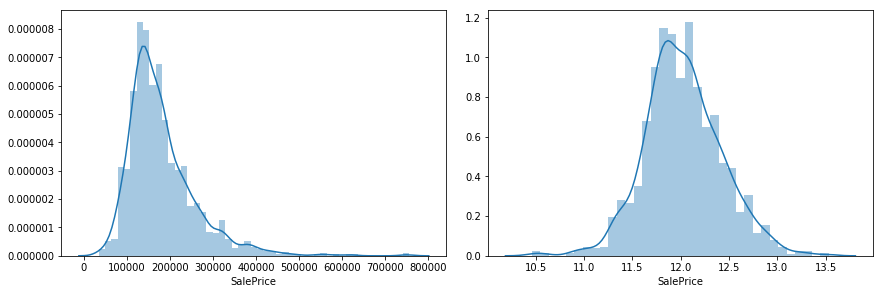

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
plt.tight_layout()

sns.distplot(np.log(df.SalePrice), ax = ax[1], label='Log of Price')

sns.distplot(df.SalePrice, ax = ax[0], label='Distribution of Sale Price')
plt.show()


In [14]:
scipy.stats.skew(df.SalePrice, axis=0, bias=True)

1.880940746034036

Looking at the distribution of Sale Price, we can see from the plot and the computed skewness that our distribution is skewed towards the right. Taking the log of Sale price shows a more normal distribution.

In [15]:
#check that all values are filled:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

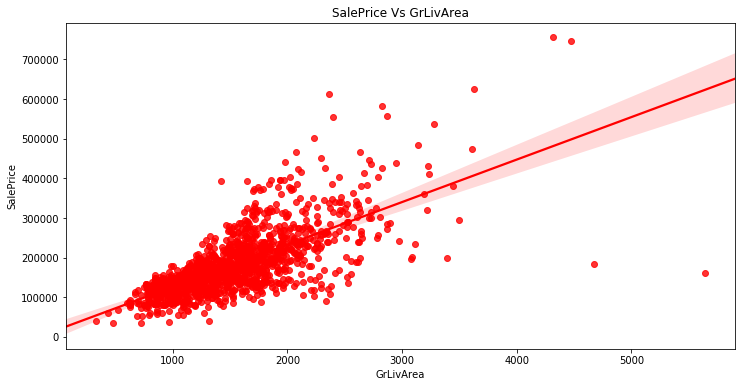

In [16]:
#plot Sale Price and 'GrLivArea' Scatter plot:
plt.figure(figsize = (12, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=df, color='red')
plt.title('SalePrice Vs GrLivArea')
plt.show()

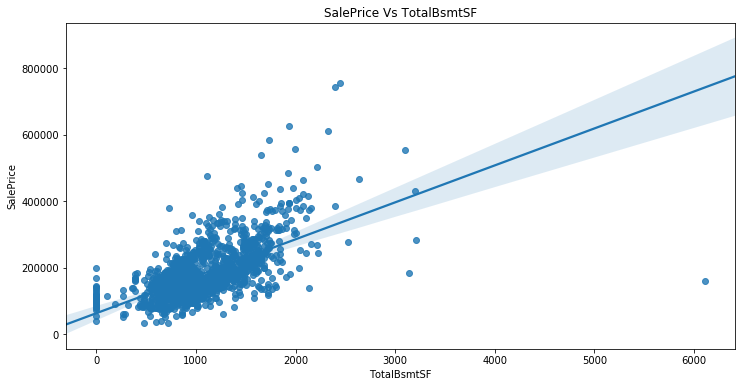

In [17]:
#plot Scatter plot of Sale Price and 'TotalBsmtSF'
plt.figure(figsize = (12, 6))
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=df,)
plt.title('SalePrice Vs TotalBsmtSF')
plt.show()

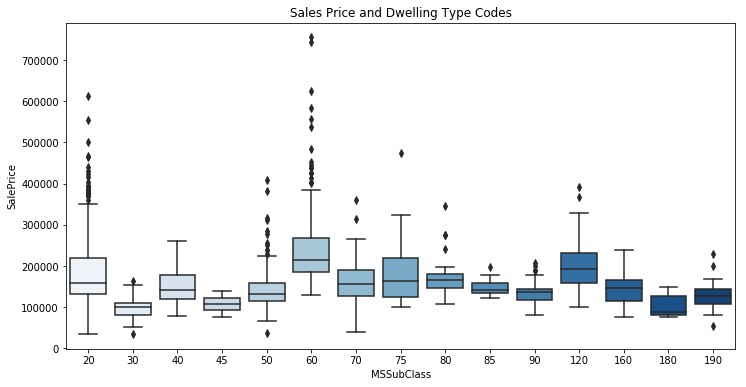

In [18]:
# Plot Box plot of 'MSSubClass Codes:
plt.figure(figsize = (12, 6))
sns.boxplot(x='MSSubClass', y='SalePrice', data=df, palette="Blues")
plt.title('Sales Price and Dwelling Type Codes')
plt.show()

MSSubClass Codes:

- 20:	1-STORY 1946 & NEWER ALL STYLES
- 30:	1-STORY 1945 & OLDER
- 40:	1-STORY W/FINISHED ATTIC ALL AGES
- 45:	1-1/2 STORY - UNFINISHED ALL AGES
- 50:	1-1/2 STORY FINISHED ALL AGES
- 60:	2-STORY 1946 & NEWER 
- 70:	2-STORY 1945 & OLDER
- 75:	2-1/2 STORY ALL AGES
- 80:	SPLIT OR MULTI-LEVEL
- 85:	SPLIT FOYER
- 90:	DUPLEX - ALL STYLES AND AGES
- 120:	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
- 150:	1-1/2 STORY PUD - ALL AGES
- 160:	2-STORY PUD - 1946 & NEWER
- 180:	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
- 190:	2 FAMILY CONVERSION - ALL STYLES AND AGES

The Plot reveals 2-Story homes bulit after 1945 are priced higher on average while 1-story 1945 & older have the lowest average sale price.

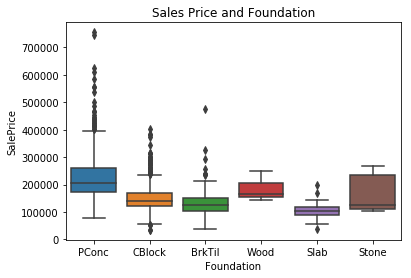

In [19]:
sns.boxplot(x='Foundation', y='SalePrice', data=df)
plt.title('Sales Price and Foundation')
plt.show()

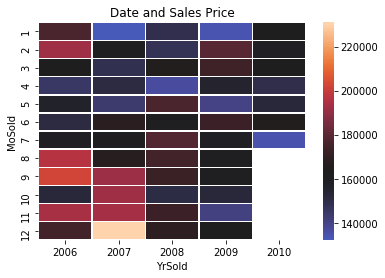

In [20]:
# Look at  how avg sale price changed over time:
pt = df.pivot_table("SalePrice", "MoSold", "YrSold", aggfunc='median')
ax = sns.heatmap(pt, linewidths=.5, center=np.median(df.SalePrice))
plt.title('Date and Sales Price')
plt.show()

Looking at the heatmap of sales price and homes, housing prices peaked in late 2007 then started to decline. This decline coinsides with the decline in the average Sales price of homes in the US

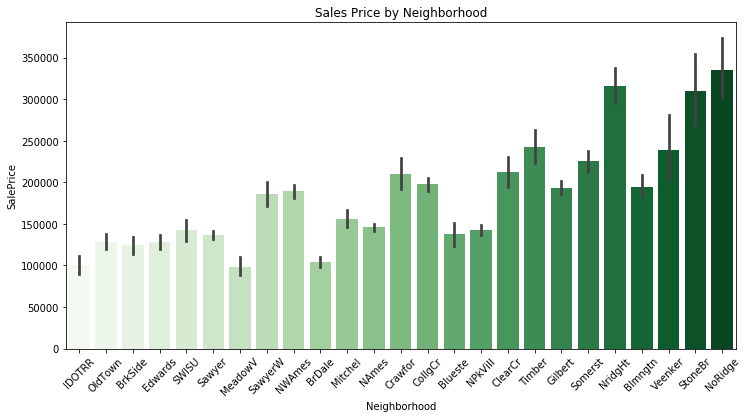

In [21]:
# View Price by Neighborhood:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Neighborhood', y = 'SalePrice', data = df.sort_values(by='SalePrice'), palette='Greens')
xt = plt.xticks(rotation=45)
plt.title('Sales Price by Neighborhood')
plt.show()

The ‘Sales Price by Neighborhood’ Plot shows ‘NoRidge’, ‘StoneBr’, and ‘NridgeHt’ are the neighborhoods with the highest average sales price. It seems that ‘BrDale’, ‘MeadowV’, and ‘IDOTRR’ are neighborhoods with the lowest average sales price. 

In [22]:
#investigate GrLivArea of above neighborhood homes.
chomes = df[df['Neighborhood'] == 'MeadowV']
ahomes = df[df['Neighborhood'] == 'BrDale']
bhomes = df[df['Neighborhood'] == 'IDOTRR']

ln = pd.concat([chomes, ahomes, bhomes], axis=0)

ln.GrLivArea.describe()

count      70.000000
mean     1122.257143
std       316.911760
min       480.000000
25%       987.000000
50%      1109.500000
75%      1313.750000
max      2521.000000
Name: GrLivArea, dtype: float64

In [23]:
df.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

Homes in the above mentioned neighborhood have a significantly lower average GrLivArea that the data set. 

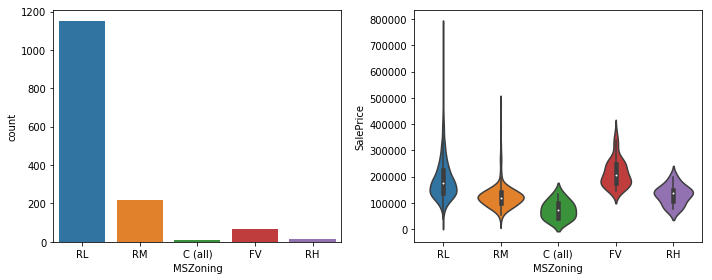

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.violinplot(x = 'MSZoning', y = 'SalePrice', data = df)
sns.countplot('MSZoning', data = df,ax = ax[0])
plt.tight_layout()
plt.show()

#### MSZoning Codes:
 - A:	Agriculture
 - C:	Commercial
 - FV:	Floating Village Residential
 - I:	Industrial
 - RH:	Residential High Density
 - RL:	Residential Low Density
 - RP:	Residential Low Density Park 
 - RM:	Residential Medium Density

# Statistical Analysis

In [25]:
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from collections import defaultdict

In [26]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

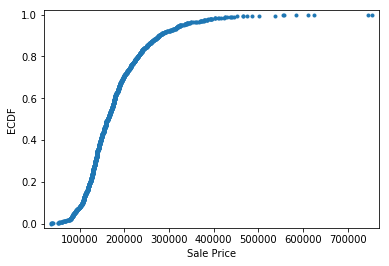

In [27]:
# Make ecdf plot of Sale price:
x, y = ecdf(df.SalePrice)
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.margins(.02)
plt.ylabel('ECDF')
plt.xlabel('Sale Price')
plt.show()

The ecdf curve shows that 90% percent of the data has a sale price at or below 300K and confirms what the distribution of score is skewed to the right.

In [28]:
# Calculate the Correlation between Continuous Variables and Sale Price:
resdict = defaultdict(list)
corr_mat = df.corr()
cor_dict = corr_mat['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))
    resdict[ele[0]].append(ele)

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
MasVnrArea: 	0.47261449900457725
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
GarageYrBlt: 	0.2613664351029631
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
LotFrontage: 	0.20962394479948315
BedroomAbvGr: 	0.1682131543007415
KitchenAbvGr: 	-0.1359073708421417
EnclosedPorch: 	-0.12857795792595636
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MSSubClass: 	-0.08428413512659523
OverallCon

The function shows GrLiveArea, GarageCars, GarageArea, 1stFlrSF, TotalBsmtSf and FullBath are varaibles with the highest correlation with 'SalePrice.' We will test weather this correlation is by chance or there is a true correlation between these variables and 'SalePrice'.

In [29]:
# Place Highly correlated Variables in Dataframe:
dfres1 = pd.DataFrame.from_dict(resdict, orient='index')
dfres1 = dfres1[0].apply(pd.Series).drop(0, axis=1)
dfres1.columns = ['Correlation']
Hcv = dfres1[dfres1['Correlation'] > .5]


In [30]:
# Look at each variable individual affect on Sale Price:
for x in dfres1.index:
    a, b = np.polyfit(df[x], df.SalePrice,1)
    print(x)
    print('Slope :',a)
    print('Intercept :',b,'\n')


OverallQual
Slope : 45435.80259309937
Intercept : -96206.07951476026 

GrLivArea
Slope : 107.13035896582518
Intercept : 18569.025856487286 

GarageCars
Slope : 68077.9976463468
Intercept : 60618.980871524145 

GarageArea
Slope : 231.6456145094044
Intercept : 71357.42140747691 

TotalBsmtSF
Slope : 111.10960368712767
Intercept : 63430.628545506195 

1stFlrSF
Slope : 124.5006222206582
Intercept : 36173.446795121235 

FullBath
Slope : 80848.1667865402
Intercept : 54388.27732380532 

TotRmsAbvGrd
Slope : 26086.18084719235
Intercept : 10896.471957614758 

YearBuilt
Slope : 1375.3734679368933
Intercept : -2530308.2457323577 

YearRemodAdd
Slope : 1951.2994060556643
Intercept : -3692146.16986735 

MasVnrArea
Slope : 207.74300555591512
Intercept : 159499.3347743503 

Fireplaces
Slope : 57539.83183756454
Intercept : 145648.49075710942 

BsmtFinSF1
Slope : 67.30604049404647
Intercept : 151061.56252564327 

WoodDeckSF
Slope : 205.62042373751538
Intercept : 161542.5976404036 

2ndFlrSF
Slope : 58.

In [31]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

In [32]:
# define function to test correlation:
def test_corr(cols, df=df):
    r_obs = pearson_r(cols, df.SalePrice.values)
    perm_replicates = np.empty(10000)

    for i in range(10000):
        cols_permuted = np.random.permutation(cols)
        perm_replicates[i] = pearson_r(cols_permuted, df.SalePrice.values)

    p = np.sum(perm_replicates >= r_obs ) / len(perm_replicates)
    return print('p-val =', p)

In [33]:
# Loop through variables and test correlation:
for x in dfres1.index :
    if dfres1.loc[x][0] > .5:
        print('\n',x)
        test_corr(df[x].values)


 OverallQual
p-val = 0.0

 GrLivArea
p-val = 0.0

 GarageCars
p-val = 0.0

 GarageArea
p-val = 0.0

 TotalBsmtSF
p-val = 0.0

 1stFlrSF
p-val = 0.0

 FullBath
p-val = 0.0

 TotRmsAbvGrd
p-val = 0.0

 YearBuilt
p-val = 0.0

 YearRemodAdd
p-val = 0.0


These are the variable that have a correlation with sale price higher than .5 and passed the correlation test. Next i want to look as the categorical variables within the data. Below ive defined a function that conducts a chi squared test. I will use this function to test the significance on the categorical variables when predicting sales price.

In [34]:
#define funtion for chi test:
def Chi_test(data,c1,c2):
    #combine columns into matrix
    table = pd.crosstab(data[c1], data[c2])
    
    colsum = table.sum(axis=0)
    colpct = table / colsum
    cstable = stats.chi2_contingency(table)
    
    return cstable[0], cstable[1], cstable[2]

In [35]:
objectcl = df.loc[:, df.dtypes == 'object'].columns

In order for the chi squared test to work, we categorize Sale price. I will split them into 2 groups High Price Homes(HPH) and Low Price Homes(LPH).

In [36]:
# Split Homes by Sale price in 'LPH' and 'HPH':
SPavg = np.mean(df.SalePrice)

bins = [0, SPavg, max(df.SalePrice)+1]

bin_names = ['LPH', 'HPH']

df1 = df.copy()

df1['SPcat'] = pd.cut(df1['SalePrice'], bins, labels=bin_names)

HPH = df1[df1['SalePrice'] >= SPavg ]
LPH = df1[df1['SalePrice'] < SPavg ]

In [37]:
from collections import defaultdict

In [38]:
# Chi-Squared test on Categorical data in DF and filter out variables that have failed test:
res = defaultdict(list)
for x in objectcl:
    Chi_test(df1, x, 'SPcat')
    if Chi_test(df1, x, 'SPcat')[1] < .01 and Chi_test(df1, x, 'SPcat')[2] > 3:
        res[x].append(list(Chi_test(df1, x, 'SPcat')))

In [39]:
#view result in DataFrame:
dfres = pd.DataFrame.from_dict(res, orient='index')
dfres = dfres[0].apply(pd.Series)
columns = ['Chi Statistic','P-Value','Expected Value']
dfres.columns = columns

In [40]:
dfres

,Chi Statistic,P-Value,Expected Value
MSZoning,148.654788,3.953446e-31,4.0
LotConfig,35.698353,3.338055e-07,4.0
Neighborhood,667.687761,1.533812e-125,24.0
Condition1,64.202588,6.937136e-11,8.0
BldgType,54.074459,5.077098e-11,4.0
HouseStyle,145.607947,3.391637e-28,7.0
RoofStyle,18.436013,2.446791e-03,5.0
Exterior1st,275.217871,1.701998e-50,14.0
Exterior2nd,274.122764,1.299424e-49,15.0
MasVnrType,197.370629,1.380841e-41,4.0


The above dataframe showcases the categorical variables that passed that chi squared test and will be included in the final model.

In [41]:
catcol = list(dfres.index)
numcol = list(dfres1.index)
predV = catcol + numcol

Combine statistically significant numerical and categorical features into one list.

# Data Preprocessing

In [42]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, Lasso, LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import  cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

In [43]:
test = testdf[predV]

In [44]:
predV.append('SalePrice')
train = df[predV]

convert numerical columns that are actually categorical.

In [45]:
train = train.astype({'MSSubClass':'str'})

test = test.astype({'MSSubClass':'str'})

In [46]:
objs = train.select_dtypes('object').columns
print('Shape training data: {}'.format(train.shape))

Shape training data: (1460, 63)


In [47]:
X = train.reset_index(drop=True).drop(['SalePrice','MoSold', 'YrSold'], axis=1)
y = np.log(train.SalePrice)

In [48]:
# Get numerical columns
numcol = X.loc[:, X.dtypes != np.object].columns

The above Dataframe shows the numerical columns with skewed values. I will use RobustScaler to transform the numerical columns.

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer

In [50]:
#get dummy varables for categorical data:
X = pd.get_dummies(X, columns=objs, drop_first=True)


In [51]:
# Check the skew of all numerical features
skewed_feats = X[numcol].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


In [52]:
# Scale numerical features
X[skewness.index] = RobustScaler().fit_transform(X[skewness.index])
# create copy of data to use for different model.
Lx = X.copy()

In [53]:
len(X.columns)

218

In [54]:
#define fucntion to reduce feature variables based on Vif:
class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=10, impute=False, impute_strategy='median'):
        
        self.thresh = thresh
        
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=10):
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X
    

In [55]:
# transform data set using ReduceVIF:
transformer = ReduceVIF()

X = transformer.fit_transform(X,y)

X.head()

ReduceVIF fit
ReduceVIF transform


C:\Users\eshai\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping GrLivArea with vif=inf
Dropping BldgType_Duplex with vif=inf
Dropping Exterior1st_CBlock with vif=inf
Dropping BsmtQual_none with vif=inf
Dropping BsmtCond_none with vif=inf
Dropping GarageType_none with vif=inf
Dropping GarageQual_none with vif=inf
Dropping BsmtFinSF1 with vif=51599.89207858874
Dropping GarageCond_TA with vif=2465.061931176491
Dropping GarageYrBlt with vif=2146.083741246371
Dropping ExterCond_TA with vif=441.5753094186346
Dropping GarageQual_TA with vif=417.4204620939084
Dropping MSZoning_RL with vif=195.74835418642581
Dropping Exterior1st_VinylSd with vif=166.24465002379497
Dropping GarageType_Attchd with vif=161.87156801903672
Dropping MSSubClass_20 with vif=143.40290985886486
Dropping RoofStyle_Gable with vif=130.95671670009116
Dropping Functional_Typ with vif=124.50164382965617
Dropping BsmtFinType2_Unf with vif=110.56976283333647
Dropping BsmtFinType1_none with vif=92.7344588255387
Dropping HouseStyle_1Story with vif=80.17608205202866
Dropping MasVnrType

,OverallQual,GarageCars,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearRemodAdd,MasVnrArea,Fireplaces,WoodDeckSF,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,0.5,0.0,0.281573,-0.269652,0.0,1.0,0.243243,1.193303,-1.0,0.000000,...,0,0,0,0,1,0,0,0,0,0
1,0.0,0.0,-0.082816,0.538308,0.0,0.0,-0.486486,0.000000,0.0,1.773810,...,0,0,0,0,0,0,0,0,0,0
2,0.5,0.0,0.530021,-0.142289,0.0,0.0,0.216216,0.986301,0.0,0.000000,...,0,0,0,0,1,0,0,0,0,0
3,0.5,1.0,0.670807,-0.468657,-1.0,0.5,-0.648649,0.000000,0.0,0.000000,...,0,0,0,0,0,1,0,0,0,0
4,1.0,1.0,1.474120,0.305473,0.0,1.5,0.162162,2.130898,0.0,1.142857,...,0,0,0,0,1,0,0,0,0,0


The Function Dropped 42 columns from the data set. Now, i will create test and training splits for model contruction.

In [56]:
#test set for lasso 
LX_train, LX_test, Ly_train, Ly_test = train_test_split(Lx,y,random_state=5)
#test set for Ridge
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5)

# Model Construction 1: Ridge

In [57]:
# define function to mean rmse for Ridge:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [58]:
#fit model
model_ridge = Ridge()

In [59]:
#search for best alpha:
alphas = np.arange(1,30)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas).sort_values()
cv_ridge.head(5)

14    0.149804
13    0.149805
15    0.149811
12    0.149817
16    0.149826
dtype: float64

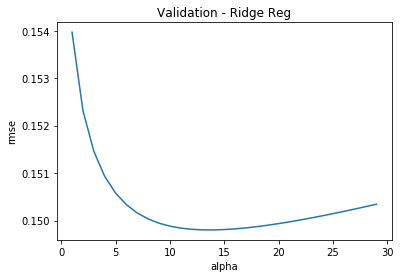

In [60]:
#visualize relationship between alpha and rmse:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Ridge Reg")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [61]:
#fit model using best parameters:
model_ridge = Ridge(alpha=14).fit(X_train, y_train)

In [62]:
# print model metrics:
print('Root Mean Squared Error of Training:{}'.format(rmse_cv(model_ridge).mean()))
print('R2 Score on Training Set:{}'.format(model_ridge.score(X_train, y_train)))
print('R2 Score on Test Set:{}'.format(model_ridge.score(X_test, y_test)))

Root Mean Squared Error of Training:0.14980378075628242
R2 Score on Training Set:0.8983171994951097
R2 Score on Test Set:0.8793031941314678


In [63]:
# make predictions on test set:
pred = model_ridge.predict(X_test)

# Model 2 Lasso

In [64]:
model_lasso = Lasso()

In [65]:
# define function to mean rmse for lasso:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, LX_train, Ly_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [66]:
#find best alpha:
alphas = [.0005 ,.001, .005, .01, .05, 1,]
cv_lasso = [rmse_cv(Lasso(alpha = alpha, max_iter=4000)).mean() 
            for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)

In [67]:
cv_lasso.head()

0.0005    0.146588
0.0010    0.146914
0.0050    0.158689
0.0100    0.165016
0.0500    0.204063
dtype: float64

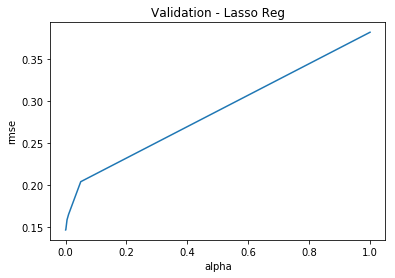

In [68]:
#visualize rmse and alphas
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation - Lasso Reg")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [69]:
model_lasso = Lasso(alpha = 0.0005, max_iter=4000).fit(LX_train, Ly_train)

In [70]:
#view model metrics
print('Root Mean Squared Error of Training:{}'.format(rmse_cv(model_lasso).mean()))
print('R2 Score on Training Set:{}'.format(model_lasso.score(LX_train, Ly_train)))
print('R2 Score on Test Set:{}'.format(model_lasso.score(LX_test, Ly_test)))

Root Mean Squared Error of Training:0.14658829784337266
R2 Score on Training Set:0.9081630929003544
R2 Score on Test Set:0.8976041648342504


In [71]:
# use model to make predictions on test set:
pred2 = model_lasso.predict(LX_test)

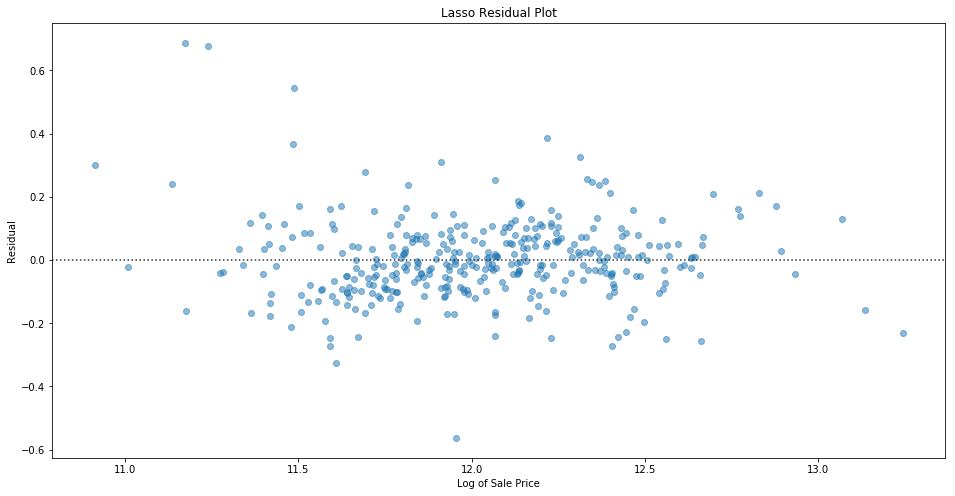

In [72]:
#Make Residual plt: 
plt.rcParams['figure.figsize'] = (16.0, 8.0)
resid =  pred2 - Ly_test
sns.residplot(pred2, resid, scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel('Residual')
plt.xlabel('Log of Sale Price')
plt.title('Lasso Residual Plot')
plt.show()

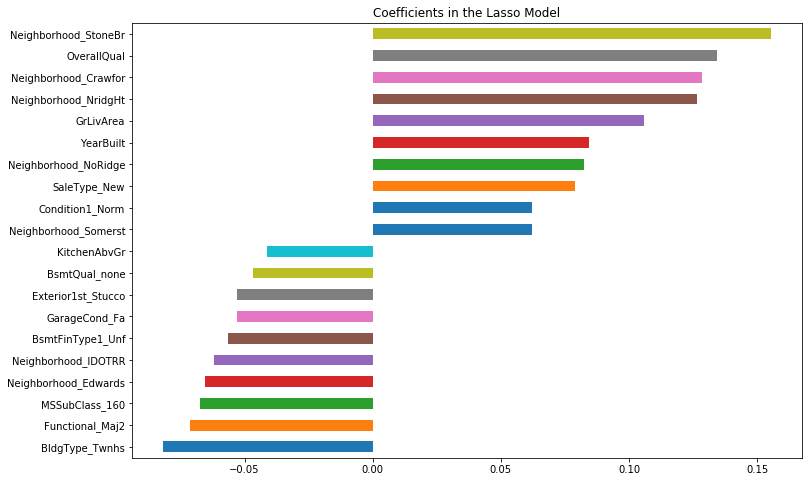

In [73]:
# Visualize feature coeffcients:
coef = pd.Series(model_lasso.coef_, index = LX_train.columns)
imp_feat = pd.DataFrame({'Feature':LX_train.columns, 'coef':model_lasso.coef_})

imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])

plt.rcParams['figure.figsize'] = (12.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.style.use('_classic_test')
plt.show()

In [74]:
reduced_feat = list(imp_feat[imp_feat['coef'] == 0]['Feature'])

The chart above shows that features with the highest coefficients. As predicted, OverallQual, TotalSF, and Neighborhood are among the the variables with the highest coefficients. Looking at some variables with the lowest coeffiecients, we see MSSubclass_160, Neighborhood_IDOTRR, and KitchenAbvGr. Although these varables negative impact is minimal.

# Model 3: ElasticNet

In [75]:
# drop reduced features from training and test set:
model_elastic = ElasticNet()


In [76]:
# Use GridSearhcv to find best Params:
alphas = [.001,.005,.01,.1,1]
l1 = [.4, .5, .6, .7]
    
param_grid = dict(alpha=alphas, l1_ratio=l1)
egrid = GridSearchCV(ElasticNet(max_iter=4000), param_grid=param_grid, scoring='neg_mean_squared_error')
egrid.fit(LX_train, Ly_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=4000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.005, 0.01, 0.1, 1], 'l1_ratio': [0.4, 0.5, 0.6, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [77]:
# Print Best Params
print("The best parameter %s for model with a score of %0.2f"
      % (egrid.best_params_, -egrid.best_score_))

The best parameter {'alpha': 0.001, 'l1_ratio': 0.6} for model with a score of 0.03


In [78]:
#fit model:
model_elastic = ElasticNet(alpha=egrid.best_params_['alpha'], l1_ratio=egrid.best_params_['l1_ratio'] ).fit(LX_train, Ly_train)

In [79]:
#Print Scores:
print('Root Mean Squared Error of Training:{}'.format(rmse_cv(model_elastic).mean()))
print('R2 Score on Training Set:{}'.format(model_elastic.score(LX_train, Ly_train)))
print('R2 Score on Test Set:{}'.format(model_elastic.score(LX_test, Ly_test)))

Root Mean Squared Error of Training:0.14640917439275508
R2 Score on Training Set:0.9062037703340615
R2 Score on Test Set:0.8982605197547322


In [80]:
# model prediction:
pred3 = model_elastic.predict(LX_test)

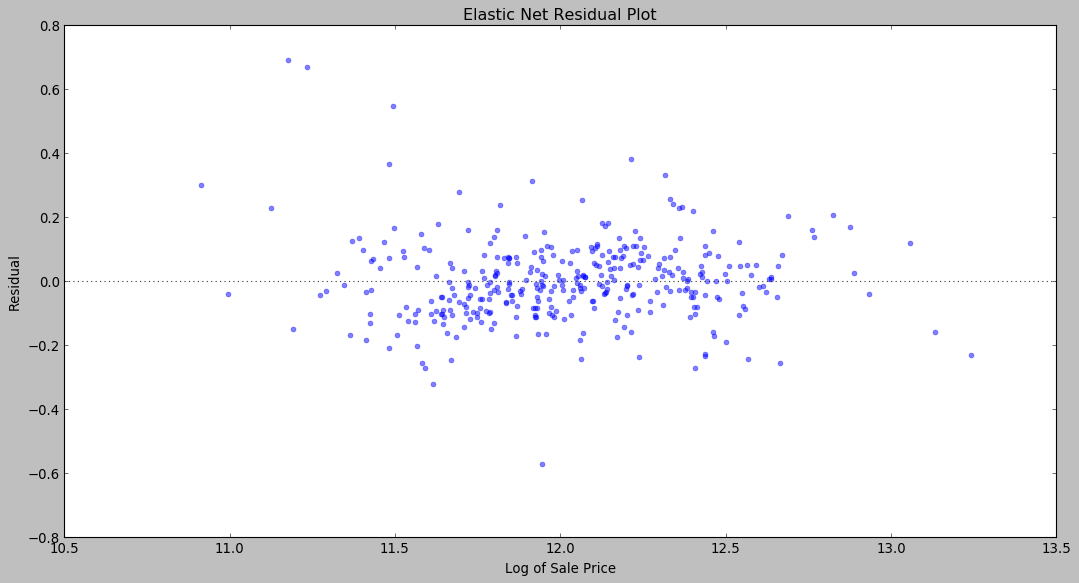

In [81]:
#Make Residual plt: 
plt.rcParams['figure.figsize'] = (16.0, 8.0)
resid =  pred3 - Ly_test
sns.residplot(pred3, resid, scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel('Residual')
plt.xlabel('Log of Sale Price')
plt.title('Elastic Net Residual Plot')
plt.show()

In [82]:
# View Coefficient:
coef = pd.Series(model_elastic.coef_, index = LX_train.columns)
imp_feat = pd.DataFrame({'Feature':LX_train.columns, 'coef':model_elastic.coef_})

In [83]:
# List feature with high coefficient:
imp_coefe = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

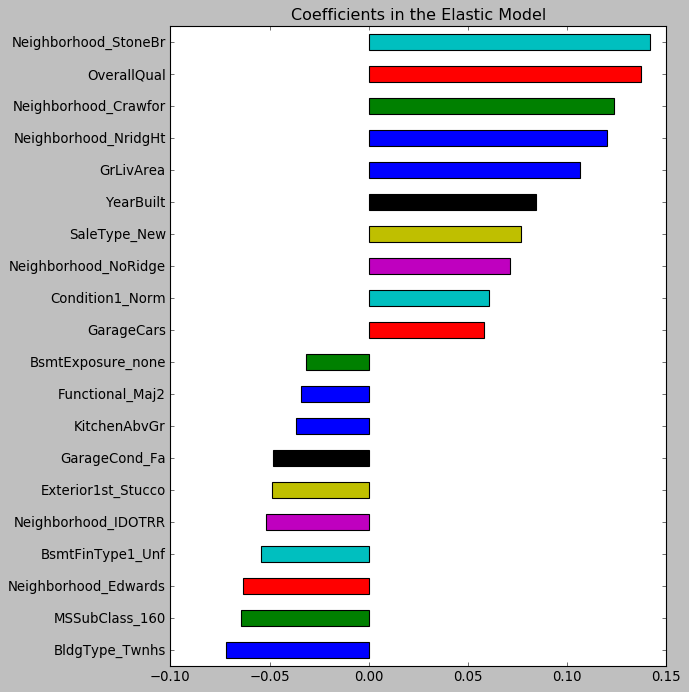

In [84]:
# plt strong predictors:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coefe.plot(kind = "barh")
plt.title("Coefficients in the Elastic Model")
plt.style.use('_classic_test')
plt.show()

In [85]:
# Check if elastic model reduced any coefficients
reduced_feat = list(imp_feat[imp_feat['coef'] == 0]['Feature'])


# ADA Boosting

In [86]:
model = AdaBoostRegressor()

In [87]:
#Use GridSearchCV to find best Params:
est = np.arange(1,10,1)
lr = np.arange(.1,.5,.1)
loss = ['linear']

param_grid = dict(n_estimators=est, learning_rate=lr, loss=loss)
grid = GridSearchCV(AdaBoostRegressor(base_estimator = ElasticNet(alpha=.001, l1_ratio=egrid.best_params_['l1_ratio'], max_iter=4000, random_state=2), random_state=1), param_grid=param_grid,scoring='neg_mean_squared_error')
grid.fit(LX_train, Ly_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.6,
      max_iter=4000, normalize=False, positive=False, precompute=False,
      random_state=2, selection='cyclic', tol=0.0001, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=50, random_state=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4]), 'loss': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [88]:
#print Best Params
print("The best parameter %s for model with a score of %0.2f"
      % (grid.best_params_, -grid.best_score_))

The best parameter {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 4} for model with a score of 0.03


In [89]:
#fit model
model_boost = AdaBoostRegressor(base_estimator = ElasticNet(alpha=.001, l1_ratio=egrid.best_params_['l1_ratio'], random_state=2), learning_rate=grid.best_params_['learning_rate'], loss=grid.best_params_['loss'], n_estimators=grid.best_params_['n_estimators'], random_state=1).fit(LX_train, Ly_train)

In [90]:
# view model metrics
print('Root Mean Squared Error of Training:{}'.format(rmse_cv(model_boost).mean()))
print('R2 Score on Training Set:{}'.format(model_boost.score(LX_train, Ly_train)))
print('R2 Score on Test Set:{}'.format(model_boost.score(LX_test, Ly_test)))

Root Mean Squared Error of Training:0.15384368477917137
R2 Score on Training Set:0.9066794527406202
R2 Score on Test Set:0.8972592797843819


In [91]:
#predict on test:
pred4 = model_boost.predict(LX_test)

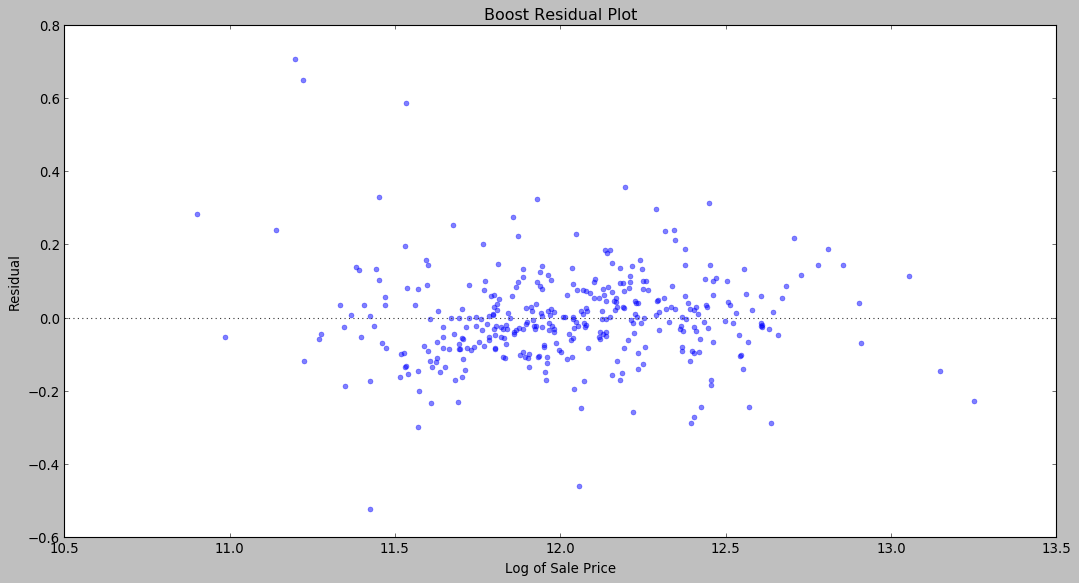

In [92]:
#Make Residual plt: 
plt.rcParams['figure.figsize'] = (16.0, 8.0)
resid =  pred4 - Ly_test
sns.residplot(pred4, resid, scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel('Residual')
plt.xlabel('Log of Sale Price')
plt.title('Boost Residual Plot')
plt.show()